## P1 - permutation-invariant functions

### P1.1

Implement the neural network specified above. Explain your implementation.

In [1]:
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.layers as layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_model(data, lat_dim, lr):
    data = tf.keras.Input(shape=(10,))
    #data = tf.keras.layers.Normalization(input_value(10,), axis=1,)(data)
    x = tf.keras.layers.Dense(100, activation='relu')(data)
    x = tf.keras.layers.Dense(lat_dim)(x)
    adder = tf.keras.layers.Lambda(lambda x: K.sum(x, axis=1, keepdims=True))   
    x = adder(x)
    x = tf.keras.layers.Dense(100, activation='relu')(x)
    x = tf.keras.layers.Dense(1)(x)
    model = tf.keras.models.Model(data, x)
    sgd = tf.keras.optimizers.SGD(learning_rate = lr)
    model.compile(optimizer=sgd, loss='mse')
    return model

I built a neural network with

1) a hidden layer with 100 neurons and ReLU activation function,

2) an output layer with `lat_dim` output units,

3) a Lambda layer that sums the outputs from the last layer. This sum operation gets rid of the ordering information.

4) a hidden layer with 100 neurons and ReLU activation function,

5) an output layer with 1 output unit

For the model compiler I used the stochastic gradient descent algorithm for the optimizer and MSE for the loss function.


### P1.2

Train the neural network with `lat_dim = 5` for 10 epochs. Show the training and validation loss versus the number of epochs. Show also the test MSE value. Repeat this but by taking `lat_dim = 100`. Discuss the obtained results. 

Training and testing data:

In [3]:
df = pd.read_csv('train-1.csv', header=None)
x = df.iloc[:, 0:10]
y = df.iloc[:, 10]
df = pd.read_csv('test-1.csv', header=None)
x_test = df.iloc[:, 0:10]
y_test = df.iloc[:, 10]

Train the neural network with `lat_dim = 5` and `lat_dim = 100`:

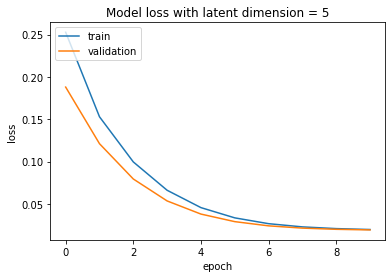

313/313 [==============================] - 0s 656us/step - loss: 0.0196
The test MSE value is 0.01955563575029373


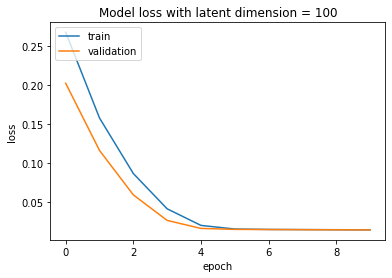

313/313 [==============================] - 0s 842us/step - loss: 0.0151
The test MSE value is 0.015063077211380005


In [4]:
for lat_dim in [5,100]:
    model = get_model(x, lat_dim, 1e-4)
    history = model.fit(x, y, epochs=10, batch_size=128, validation_split=0.1, verbose=0)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model loss with latent dimension = {lat_dim}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    print("The test MSE value is {}".format(model.evaluate(x_test, y_test)))

Model MSEs (for both training and validation) decrease quite a lot during the 10 epochs. The model MSE with `lat_dim=100` decrease faster over the epochs, and after the 10 epochs achieved slightly better performance in terms of test MSE. This suggests too low-dimensional a latent space for this model may not be enough to capture the useful aspects of the input data to learn / a higher dimensional latent space may work better.

At the earlier epochs, validation loss appear to be lower than training loss, I think this is partly because validation loss is measured after each epoch, on average half an epoch later than training loss is measured.


### P1.3

Train the neural network with `lat_dim = 100` for 10 epochs, for different values of learning rates equal to 0.01, 0.1, and 0.5. Discuss the obtained results.

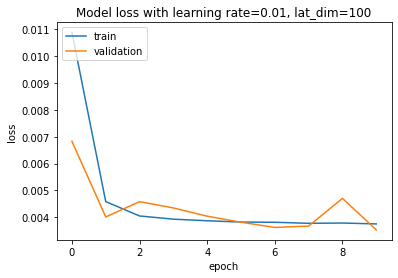

313/313 [==============================] - 0s 707us/step - loss: 0.0037
The test MSE value is 0.0036899056285619736


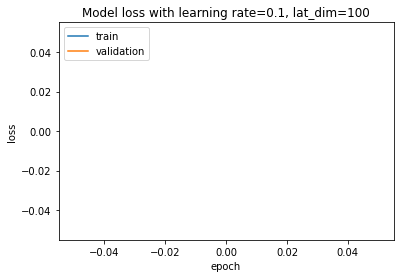

313/313 [==============================] - 0s 936us/step - loss: nan
The test MSE value is nan


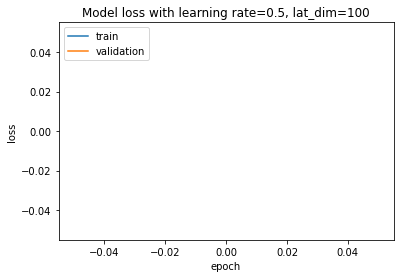

313/313 [==============================] - 0s 832us/step - loss: nan
The test MSE value is nan


In [5]:
for lr in [0.01, 0.1, 0.5]:
    model = get_model(x, 100, lr)
    history=model.fit(x, y, epochs=10, batch_size=128, validation_split=0.1, verbose=0)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model loss with learning rate={lr}, lat_dim=100')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    print("The test MSE value is {}".format(model.evaluate(x_test, y_test)))

With larger learning rates, the model MSEs show `nan`. This may be because of too large learning rates causing the solutions to be diverging.

However,`lat_dim=100` model with `learning_rate = 0.01` performs better than with `learning_rate = 1e-4` (=0.0001). This is because if we use a learning rate that is too small, it will make the updates too slow, requiring more iterations to achieve a good solution.

### P1.4

Train the neural network with `lat_dim = 100` for 50 epochs, with ReLU activation functions. Show the training and validation loss versus the number of epochs. Repeat this for the same setting but with ReLU activation functions replaced with sigmoid activation functions. Discuss the results.


 `lat_dim = 100` for 50 epochs, with ReLU activation functions:

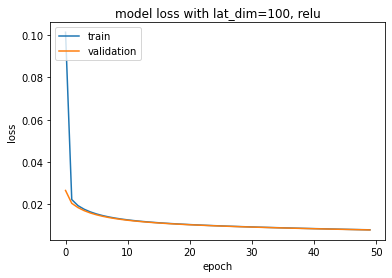

for the last epoch the training MSE is 0.008007511496543884, validation MSE is 0.007960924878716469
313/313 [==============================] - 0s 817us/step - loss: 0.0081
The test MSE value is 0.008050141856074333


In [6]:
model = get_model(x, 100, 1e-4)
history=model.fit(x, y, epochs=50, batch_size=128, validation_split=0.1, verbose=0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss with lat_dim=100, relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print(f"for the last epoch the training MSE is {history.history['loss'][-1]}, validation MSE is {history.history['val_loss'][-1]}")
print("The test MSE value is {}".format(model.evaluate(x_test, y_test)))

 `lat_dim = 100` for 50 epochs, with sigmoid activation functions:

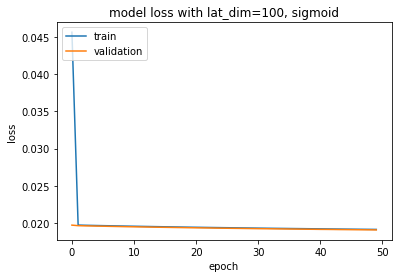

for the last epoch the training MSE is 0.019132159650325775, validation MSE is 0.019065260887145996
313/313 [==============================] - 0s 814us/step - loss: 0.0193
The test MSE value is 0.019291097298264503


In [7]:
def get_model_sigmoid(data, lat_dim, lr):
    data = tf.keras.Input(shape=(10,))
    x = tf.keras.layers.Dense(100, activation='sigmoid')(data)
    x = tf.keras.layers.Dense(lat_dim)(x)
    adder = tf.keras.layers.Lambda(lambda x: K.sum(x, axis=1, keepdims=True))   
    x = adder(x)
    x = tf.keras.layers.Dense(100, activation='sigmoid')(x)
    x = tf.keras.layers.Dense(1)(x)
    model = tf.keras.models.Model(data, x)
    sgd = tf.keras.optimizers.SGD(learning_rate = lr)
    model.compile(optimizer=sgd, loss='mse')
    return model

model = get_model_sigmoid(x, 100, 1e-4)
history = model.fit(x, y, epochs=50, batch_size=128, validation_split=0.1, verbose=0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss with lat_dim=100, sigmoid')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print(f"for the last epoch the training MSE is {history.history['loss'][-1]}, validation MSE is {history.history['val_loss'][-1]}")
print("The test MSE value is {}".format(model.evaluate(x_test, y_test)))

Model with sigmoid activation function performed worse than with ReLU activation function.
ReLU is simpler, more easily trainable, and more computationally efficient. 

The results with `learning_rate=0.01` would have looked quite different.

### P1.5

In this part you need to evaluate the neural network architecture defined above, for different values of `lat_dim` in [1, 2, ..., 10, 20, 30, ..., 100]. For each setting of `lat_dim`, run 5 independent training runs, each for 5 epochs. For each training run, select the best model found with respect to the MSE validation metric. Compute the test MSE value of the best model for each training run. For each `lat_dim`, compute the mean of the test MSE values of the best models identified in the corresponding training runs. Show the mean test MSE versus `lat_dim` in a plot. Comment the results.  


In [8]:
lat_dims=[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
values=[]
for lat_dim in lat_dims:
    for i in range(5):
        model = get_model(x, lat_dim, 1e-4)
        history = model.fit(x, y, epochs=5, batch_size=128, validation_split=0.1, verbose=0)
        test_mse = model.evaluate(x_test, y_test)
        row = [lat_dim]
        row.append(history.history['val_loss'][-1])
        row.append(test_mse)
        values.append(row)

313/313 [==============================] - 0s 880us/step - loss: 0.0170


In [9]:
values = pd.DataFrame(values, columns=['lat_dim', 'val_loss', 'test_mse'])
values

,lat_dim,val_loss,test_mse
0,1,0.030646,0.031209
1,1,0.035027,0.035679
2,1,0.031023,0.031645
3,1,0.027280,0.027856
4,1,0.037139,0.037832
...,...,...,...
90,100,0.034936,0.034347
91,100,0.015422,0.015648
92,100,0.015979,0.016100
93,100,0.018836,0.019660


In [10]:
best_values = values.loc[values.groupby("lat_dim")["val_loss"].idxmin()]
best_values

,lat_dim,val_loss,test_mse
3,1,0.027280,0.027856
8,2,0.013620,0.013913
12,3,0.034692,0.035361
15,4,0.012731,0.013278
24,5,0.013319,0.013538
26,6,0.011068,0.011103
30,7,0.012315,0.012391
38,8,0.011401,0.011908
44,9,0.011803,0.012064
45,10,0.010785,0.010793


<AxesSubplot:xlabel='lat_dim', ylabel='test_mse'>

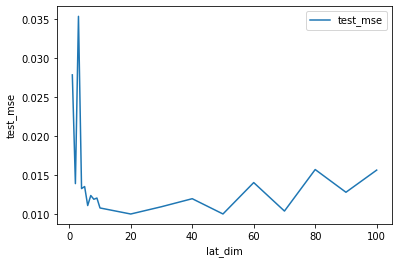

In [11]:
best_values.plot(x='lat_dim', y='test_mse', ylabel='test_mse')

It seems like with too low dimensional latent space (`lat_dim < 10`) can be suboptimal choices.

## P2 - permutation-equivariant functions

### P2.1

Implement the feedforward neural network defined above. Explain your implementation.


In [12]:
dfx = pd.read_csv('xtrain-2.csv', index_col=0)
dfy = pd.read_csv('ytrain-2.csv', index_col=0)

In [13]:
x_train = dfx.to_numpy().reshape(200000,5,3)
y_train = dfy.to_numpy().reshape(200000,5)

In [14]:
def make_model(L, w):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(15,)))
    for i in range(L-1):
        ### here should be an equivariant transformation 
        model.add(tf.keras.layers.Dense(5*w, activation="relu"))
    model.add(tf.keras.layers.Dense(5))
    adam = tf.keras.optimizers.Adam(learning_rate = 1e-4, epsilon = 1e-3)
    model.compile(optimizer=adam, loss='mse')
    return model

I made some attempts making equivariant layers with keras custom layer, but couldn't successfully implement those...

In [ ]:
class EquivariantLayer(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
    
    def build(self, input_shape):
        self.weightsA = self.add_weight(
            "weightsA",
            shape=(3,1),
            initializer=tf.keras.initializers.RandomNormal(),
        )
        self.weightsB = self.add_weight(
            "weightsB",
            shape=(3,1),
            initializer=tf.keras.initializers.RandomNormal(),
        )
        self.weightsC = self.add_weight(
            "weightsC",
            shape=(5,1),
            initializer=tf.keras.initializers.RandomNormal(),
        )

    def call(self, inputs):
        fx = tf.matmul(inputs, self.weightsA)+(1/5)*tf.matmul(tf.reduce_sum(inputs, 0), self.weightsB)+self.weightsC
        return fx

### P2.2

Train the neural network with <img src="https://render.githubusercontent.com/render/math?math=(L,w)=(2,5)">. Show the training and validation loss versus the number of epochs. Compute the test MSE value. Repeat this for <img src="https://render.githubusercontent.com/render/math?math=(L,w)"> set to (2,10), (2,100), (2,200), (3,5), (3,10), (3,100), and (3,200). Discuss the obtained results. 


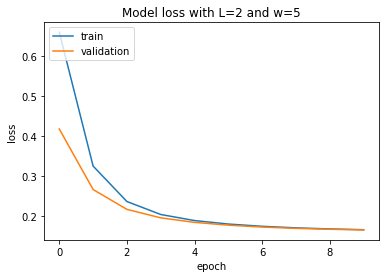

In [15]:
model=make_model(2,5)
history = model.fit(dfx, dfy, epochs=10, batch_size=300, validation_split=0.1, verbose=0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Model loss with L=2 and w=5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
    #print("The test MSE value is {}".format(model.evaluate(x_test, y_test)))